In [ ]:
%matplotlib inline
import numpy as np
import scqubits as scq
import matplotlib.pyplot as plt
from tqdm import tqdm

# SNAIL Hamiltonian in the charge basis for single DOF circuit

$$ H=-4E_\text{
        C}\partial_\phi^2-\alpha E_\text{J}\cos(\phi + \phi_{ext}) -n E_\text{J}\cos(\phi / n)$$
        
We do a cononical transformation: $$\hat{\phi} \rightarrow n\hat{\phi}, \hat{N} \rightarrow \hat{N}/n $$

$$\Rightarrow H_\text{sn}=-4\frac{E_\text{
        C}}{n^2}\partial_\phi^2-\alpha E_\text{J}\cos(n\phi+ \phi_{ext}) -n E_\text{J}\cos(\phi)$$
   
$$\Rightarrow H_\text{sn}=-4\frac{E_\text{
        C}}{n^2}\hat{N}^2-\alpha \frac{E_\text{J}}{2}(e^{i n\phi}e^{i\varphi_\text{ext}}+e^{-i n\phi}e^{-i\varphi_\text{ext}}) -n E_\text{J}(e^{i \phi} + e^{-i \phi})$$
 
 Writing in the charge basis:
  
   $$\Rightarrow H_\text{sn}=-4\frac{E_\text{
        C}}{n^2}\sum_j j^2\left|j\right>\left<j\right|-\alpha \frac{E_\text{J}}{2}\sum_j(e^{i\varphi_\text{ext}}\left|j+n\right>\left<j\right|+ e^{-i\varphi_\text{ext}}\left|j\right>\left<j+n\right|) -n E_\text{J}\sum_j(\left|j+1\right>\left<j\right| + \left|j\right>\left<j+1\right|)$$
        


In [2]:
sn = scq.SNAIL.create()

Output()

In [3]:
EJb, EC, alpha, flux, ECJ, ECg = 47, 0.1, 0.29, 0.41, 1, 100
sn = scq.SNAIL(
    EJ = EJb,
    alpha=alpha,
    EC =  EC,
    n = 3,
    ng = 0,
    flux = flux, 
    ncut = 30)

In [4]:
ens = sn.eigenvals()
ens-ens[0]

array([ 0.        ,  3.11955029,  6.1095602 ,  8.98463445, 11.76919091,
       14.49416755])

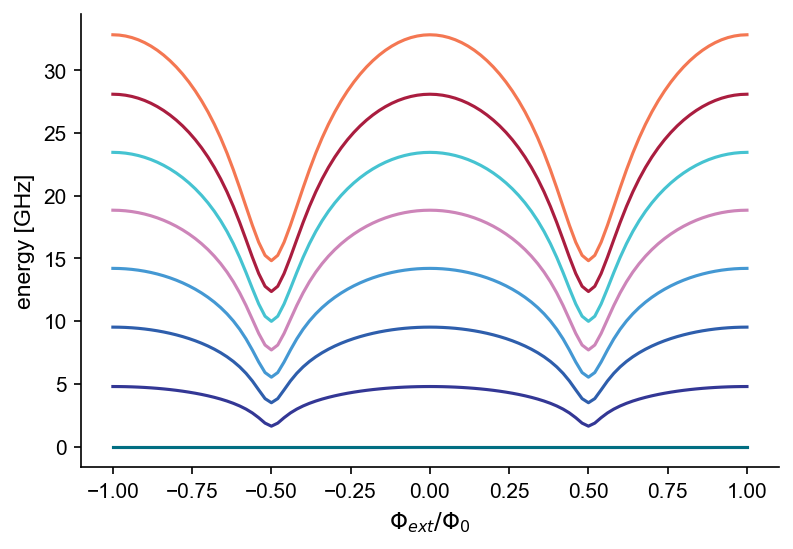

In [5]:
flux_list = np.linspace(-1, 1, 101)
sn.plot_evals_vs_paramvals('flux', flux_list, evals_count=8,subtract_ground=True);

Text(0, 0.5, 'Frequency(GHz)')

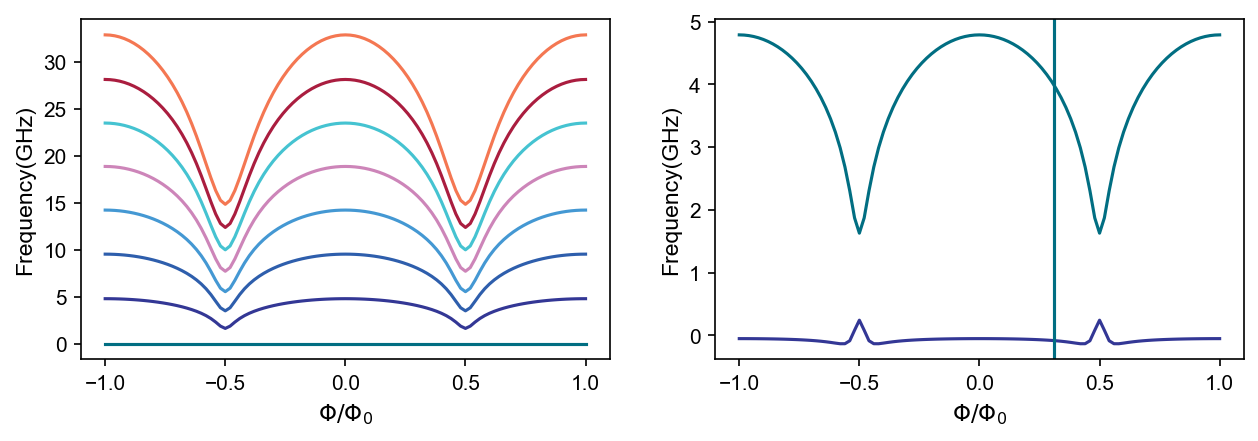

In [6]:
# sn = scq.SNAIL(EJ=47,EC=.1,flux=0.31,alpha=0.0,n=3,ncut=31)

flux_list = np.linspace(-1, 1, 101)
ens_list=[]
for flux in flux_list:
    sn.flux = flux
    ens= sn.eigenvals(evals_count=8)
    ens_list.append(ens-ens[0])
ens_list_sn = np.array(ens_list)

fig,axs = plt.subplots(1,2,figsize=(10,3))
ax = axs[0]
for ii,ens in enumerate(ens_list_sn.T):
    ax.plot(flux_list,ens)
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

alphas = [ens_list_sn.T[ii+1]-2*ens_list_sn.T[ii] for ii in range(4)]

ax = axs[1]
ax.plot(flux_list,alphas[0])
ax.plot(flux_list,alphas[1])
ax.axvline(0.31)
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

# SNAIL full circuit

In [7]:
sn = scq.SnailQubit.create()

Output()

In [53]:
EJb, EC, alpha, flux, ECJ, ECg, = 47, 0.1, 0.29, 0.41, 1, 100
sqf = scq.SnailQubit(
    EJ1 = EJb,
    EJ2 = EJb,
    EJ3 = EJb,
    EJ4 = EJb*alpha,
    EC1 =  ECJ,
    EC2 =  ECJ,
    EC3 = ECJ,
    EC4 =  EC,
    ECg1 = ECg,
    ECg2 = ECg,
    ECg3 = ECg,
    ng1 = 0,
    ng2 =  0,
    ng3 = 0,
    flux = flux, ncut = 12)

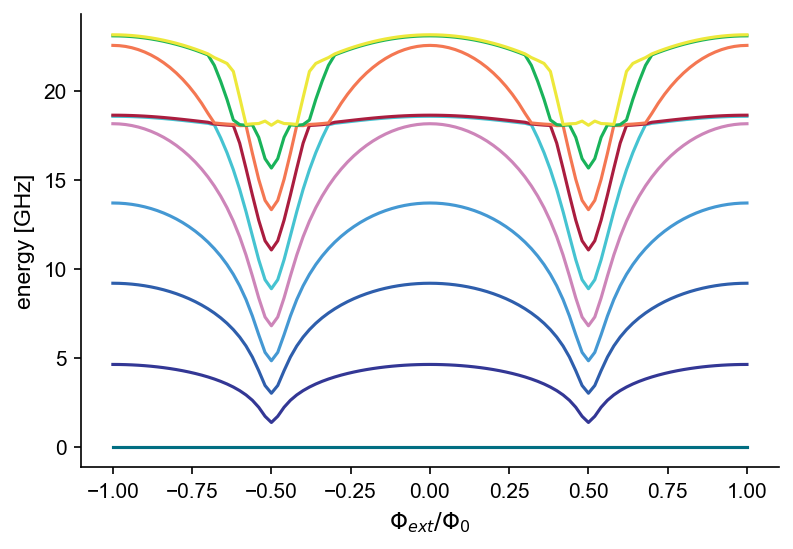

In [54]:
flux_list = np.linspace(-1, 1, 101)
sqf.plot_evals_vs_paramvals('flux', flux_list, evals_count=10,subtract_ground=True);

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [01:37<00:00,  1.04it/s]


Text(0, 0.5, 'Frequency(GHz)')

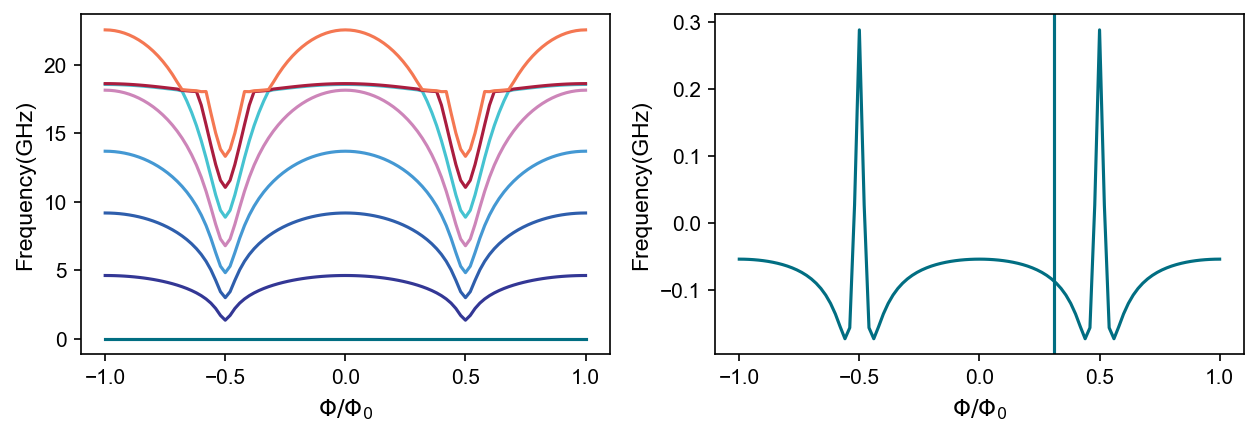

In [55]:
# sn = scq.SNAIL(EJ=47,EC=.1,flux=0.31,alpha=0.0,n=3,ncut=31)

flux_list = np.linspace(-1, 1, 101)
ens_list=[]
for flux in tqdm(flux_list):
    sqf.flux = flux
    ens= sqf.eigenvals(evals_count=8)
    ens_list.append(ens-ens[0])
ens_list_3n = np.array(ens_list)

fig,axs = plt.subplots(1,2,figsize=(10,3))
ax = axs[0]
for ii,ens in enumerate(ens_list_3n.T):
    ax.plot(flux_list,ens)
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

alphas = [ens_list_3n.T[ii+2]-2*ens_list_3n.T[ii+1] + ens_list_3n.T[ii]  for ii in range(len(ens_list_3n.T) - 2)]

ax = axs[1]
ax.plot(flux_list,alphas[0])
# ax.plot(flux_list,alphas[1])
ax.axvline(0.31)
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

# Comparison between single node and full circuit

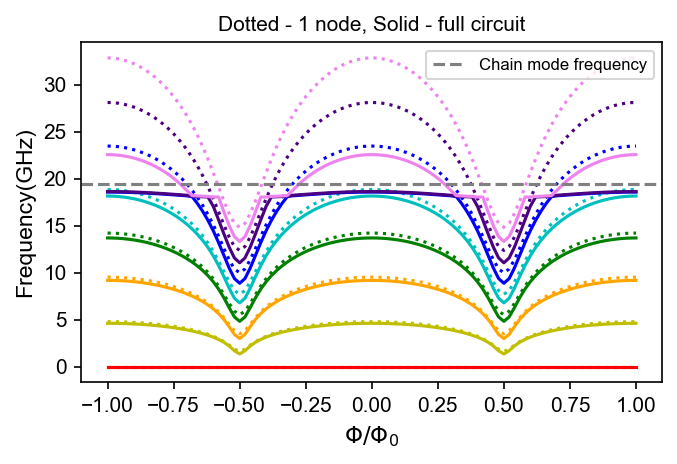

In [60]:
levs = 8
colors = ['r','y','orange','g','c','b','indigo','violet']
fig,ax = plt.subplots(1,1,figsize=(5,3))

for ii,ens in enumerate(ens_list_3n.T[:levs]):
    ax.plot(flux_list,ens, color = colors[ii])
    ax.plot(flux_list,ens_list_sn.T[ii],color = colors[ii],ls='dotted')
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')
nu_chain = np.sqrt(8*EJb*ECJ)
ax.axhline(nu_chain,color='gray',ls='dashed',label = 'Chain mode frequency')
ax.set_title('Dotted - 1 node, Solid - full circuit',fontsize = 10)
ax.legend(fontsize = 8)


# Checking full circuit capacitance matrices/implementation


- Looks good.

In [12]:
import sympy as sp
Cj1,Cj2,Cj3,Cg1,Cg2,C = sp.symbols('Cj1 Cj2 Cj3 Cg1  Cg2 C')
Ej1,Ej2,Ej3,Ej4 = sp.symbols('Ej1 Ej2 Ej3 Ej4')

Cmat = sp.Matrix([[Cj1 + Cj2 + Cg1,-Cj2, 0],[-Cj2,Cj2+Cg2+Cj3,-Cj3],[0, -Cj3,Cj3+C]])

In [13]:
Cmat

Matrix([
[Cg1 + Cj1 + Cj2,            -Cj2,       0],
[           -Cj2, Cg2 + Cj2 + Cj3,    -Cj3],
[              0,            -Cj3, C + Cj3]])

In [14]:
c1 = 1 / (2 * ECJ)
c2 = 1 / (2 * ECJ)
c3 = 1 / (2 * ECJ)
c4 = 1 / (2 * EC)

cg1 = 1 / (2 * ECg)
cg2 = 1 / (2 * ECg)
cg3 = 1 / (2 * ECg)

In [15]:
capacitance = np.array(
            [[c1 + c2 + cg1, -c2, 0],
             [-c2, c2 + c3 + cg2, -c3],
             [0, -c3, c3 + c4 + cg3],
            ]
        )
E_c = 0.5 * np.linalg.inv(capacitance)

In [16]:
E_c

array([[0.67161767, 0.34995152, 0.03178488],
       [0.34995152, 0.70340255, 0.06388761],
       [0.03178488, 0.06388761, 0.09662921]])

# After the addition of offset charges 

## Full circuit

In [ ]:
EJb, EC, alpha, flux, ECJ, ECg, = 47, 0.1, 0.29, 0.41, 1, 100
sqf = scq.SnailQubit(
    EJ1 = EJb,
    EJ2 = EJb,
    EJ3 = EJb,
    EJ4 = EJb*alpha,
    EC1 =  ECJ,
    EC2 =  ECJ,
    EC3 = ECJ,
    EC4 =  EC,
    ECg1 = ECg,
    ECg2 = ECg,
    ECg3 = ECg,
    ng1 = 0,
    ng2 =  0,
    ng3 = 0,
    flux = flux, ncut = 10)

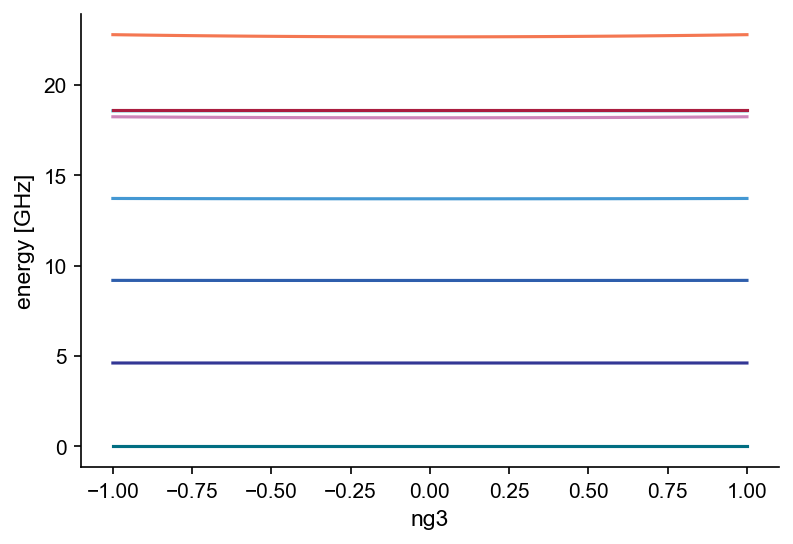

In [17]:
sqf.flux = 0.0
ng3_list = np.linspace(-1, 1, 51)
sqf.plot_evals_vs_paramvals('ng3', ng3_list, evals_count=8,subtract_ground=True);

In [18]:
ng3_list = np.linspace(-2, 2, 101)
specdata = sqf.get_spectrum_vs_paramvals(param_name='ng3', param_vals=ng3_list, subtract_ground=True);

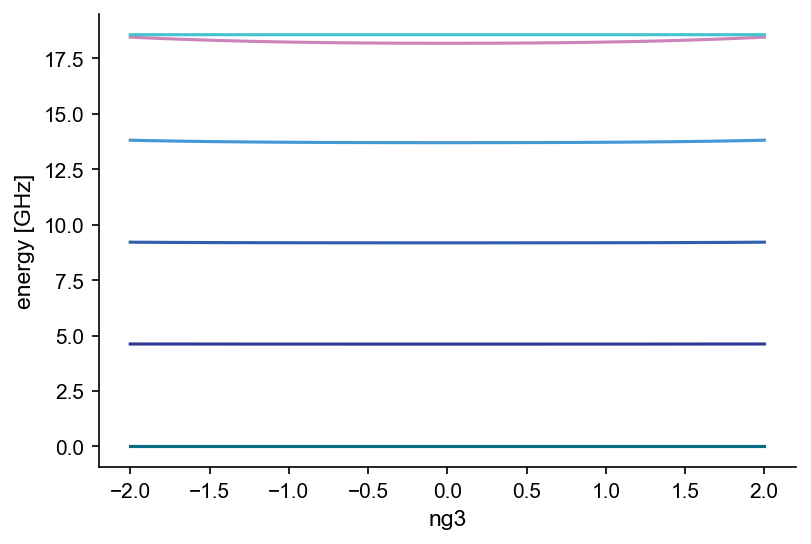

In [19]:
specdata.plot_evals_vs_paramvals();

Text(0, 0.5, 'Frequency(GHz)')

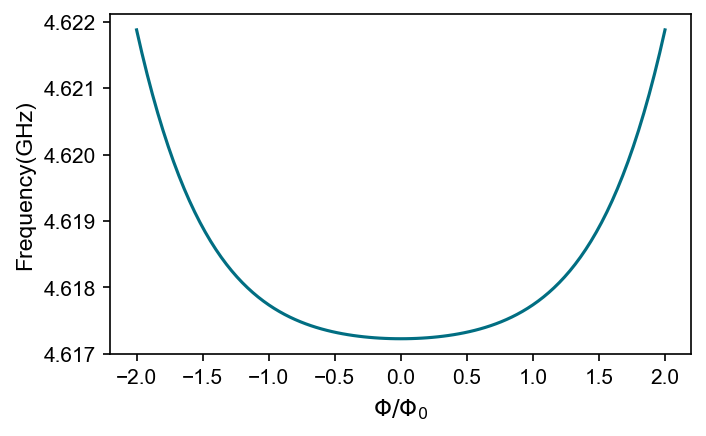

In [20]:
ens1 = specdata.energy_table.T[1]

fig,ax = plt.subplots(1,1,figsize=(5,3))


ax.plot(ng3_list,ens1,ls='-')
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

## Charge dependence because the cutoff is too low.

## Single node circuit

In [21]:
EJb, EC, alpha, flux, ECJ, ECg = 20, 0.2, 0.29, 0.41, 1, 100
sn = scq.SNAIL(
    EJ = EJb,
    alpha=alpha,
    EC =  EC,
    n = 3,
    ng = 0,
    flux = flux, 
    ncut = 110)

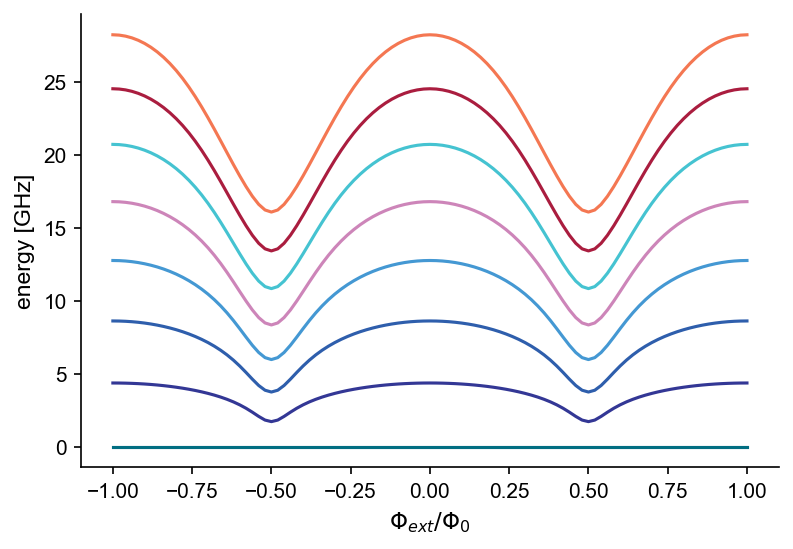

In [22]:
flux_list = np.linspace(-1, 1, 101)
sn.plot_evals_vs_paramvals('flux', flux_list, evals_count=8,subtract_ground=True);

In [23]:
sn.flux = 0.0
ng_list = np.linspace(-6, 6, 101)
specdata2 = sn.get_spectrum_vs_paramvals(param_name='ng', param_vals=ng_list, subtract_ground=True);


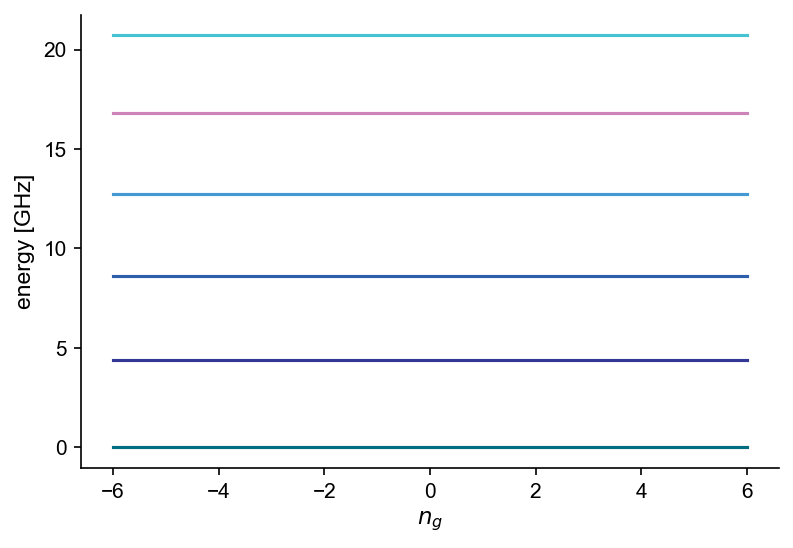

In [24]:
specdata2.plot_evals_vs_paramvals();

In [26]:
sn.flux = 0.5
ng_list = np.linspace(-6, 6, 101)
specdata3 = sn.get_spectrum_vs_paramvals(param_name='ng', param_vals=ng_list, subtract_ground=True);

Text(0, 0.5, 'Frequency(GHz)')

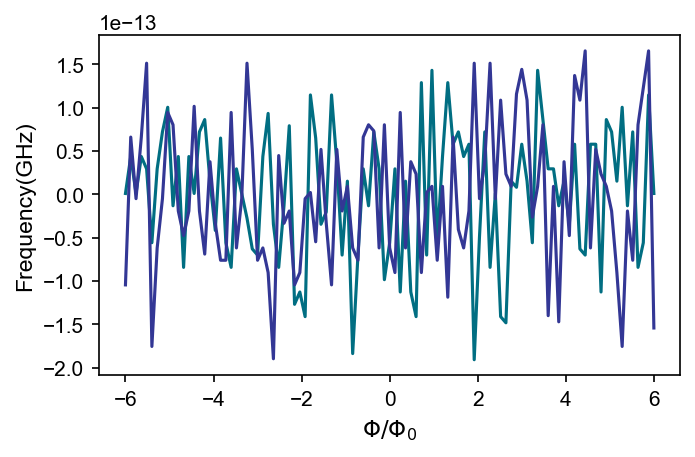

In [33]:
ens1 = specdata2.energy_table.T[1] 
ens1 = ens1 - np.mean(ens1)

ens2 = specdata3.energy_table.T[1] 
ens2 = ens2 - np.mean(ens2)

fig,ax = plt.subplots(1,1,figsize=(5,3))


ax.plot(ng_list,ens1,ls='-')
ax.plot(ng_list,ens2,ls='-')
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

In [34]:
tmon = scq.Transmon.create()

Output()

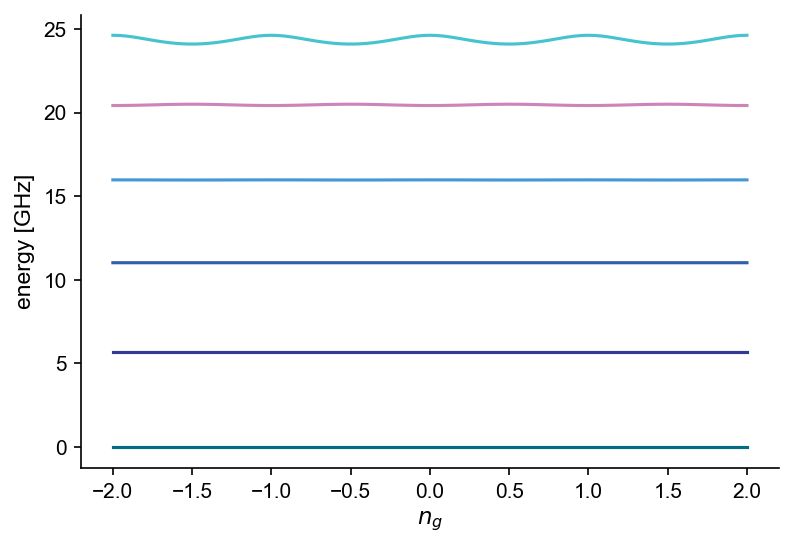

In [35]:
ng_list = np.linspace(-2, 2, 101)
tmon.plot_evals_vs_paramvals(param_name='ng', param_vals=ng_list, subtract_ground=True);